In [67]:
from cmath import *
from math import *
from numpy import *
import matplotlib.pyplot as plt

Primeiro vamos calcular as impedâncias equivalentes de cada bobina, sendo a bobina 1 essa aqui:
(incluir imagem)

In [168]:
C1 = 4.7e-6
R1 = 719.7e-3
L1 = 0.152e-3

#primeiro é necessário calcular o w do circuito, em um circuito RL o w é dado por 1/(lc)**0.5
w = 1/sqrt(L1*C1)

In [169]:
#Depois vamos calcular as impedâncias equivalentes da bobina 1
XC1 = 1 /(1j*w*C1)
XL1 = 1j*w*L1
ZeqB1 = R1 + XC1 + L1

In [170]:
#Faremos a mesma coisa para a bobina 2
C2 = C1
Rc = 400
L2 = L1
R2 = R1

XC2 = 1 /(1j*w*C2)
XL2 = 1j*w*L2

#porém agora a impedância equivalente será calculada levando em conta que o capacitor C2 está em paralelo com o resistor Rc
ZeqC2RC = 1/((1/XC2)+(1/Rc))
ZeqB2 = R2 + XL2 + ZeqC2RC

Uf = 10*2/pi


k = 0.6 
M = k * sqrt(L1*L2)

1/(2*pi*sqrt(L2*C2))

5954.556339159688

In [171]:
A = array([[(R1+XL1+XC1),(-1j*w*M)],[(-1j*w*M), (R2+XL2+ZeqC2RC)]])
V = array ([Uf,0])
I = dot(linalg.inv(A),V)
print(I[0],I[1])

(0.41709540586857013+0.0005705442410701487j) (0.00012034185825924695+1.777785273607479j)


In [172]:
#Agora vamos fazer uma função que devolve as correntes para facilitar o plot do gráfico
def correntes (f,C1):
    w = 2*pi*f
    R1 = 719.7e-3
    L1 = 0.134e-3
    Rc = 400
    L2=L1
    C2=C1
    R2=R1
    XC2 = 1 /(1j*w*C2)
    XL2 = 1j*w*L2
    XC1 = 1 /(1j*w*C1)
    XL1 = 1j*w*L1
    ZeqC2RC = 1/((1/XC2)+(1/Rc))
    Uf = 10*(2/pi)
    k=0.1
    M = k * sqrt(L1*L2)
    A = array([[(R1+XL1+XC1),(-1j*w*M)],[(-1j*w*M), (R2+XL2+ZeqC2RC)]])
    V = array ([Uf,0])
    I = dot(linalg.inv(A),V)
    return I[0],I[1]

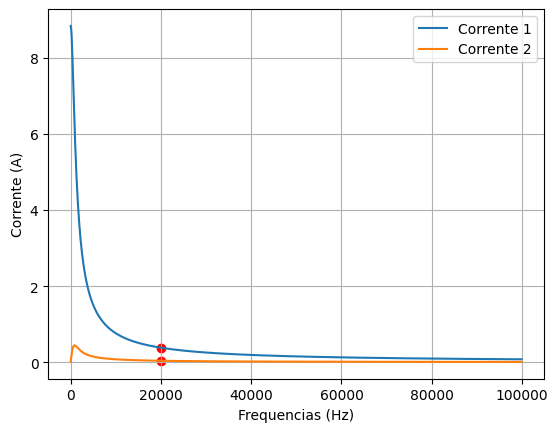

In [173]:
frequencias = range(10,100000,100)
correntes_1 = []
correntes_2 = []

for f in frequencias:
    I1 = correntes(f,0.6)[0]
    I2 = correntes(f,0.6)[1]
    correntes_1.append(abs(I1))
    correntes_2.append(abs(I2))

plt.plot(frequencias,correntes_1, label='Corrente 1')
plt.plot(frequencias,correntes_2, label='Corrente 2')
plt.scatter(20000,abs(correntes(20000,0.6)[0]),c="r")
plt.scatter(20000,abs(correntes(20000,0.6)[1]),c="r")
plt.legend()
plt.xlabel('Frequencias (Hz)')
plt.ylabel('Corrente (A)')
plt.grid()
plt.show()

    

In [174]:
#fazer função que prove isso
ind_freq_corr_max_1 = correntes_1.index(max(correntes_1))
ind_freq_corr_max_2 = correntes_2.index(max(correntes_2))
freq_corr_max_1 = frequencias[ind_freq_corr_max_1]
freq_corr_max_2 = frequencias[ind_freq_corr_max_2]
fressonancia = 1/(2*pi*sqrt(L2*C2))
fressonancia,freq_corr_max_1,freq_corr_max_2



(5954.556339159688, 10, 910)

Quando as correntes são máximas, a frequência correspondentes são iguais a de ressonância? 

$F_r = 11253.95$ 
 $F_m1 = 8510$
 $F_m2 = 99910$

R: Como podemos ver não são as mesmas, apesar de que no caso da corrente I1, a frequência quando esta chega ao seu valor máximo se aproxima mais da frequência de ressônancia


Com a bobina já montada não tivemos o resultado esperado em relação a tensão V2. Como fazemos o cálculo dela através do produto entre a corrente I2 e a impedância equivalente da associação em paralelo do resistor de carga e o capacitor C2. Assim decidimos, com a indutância da bobinajá  montada, fazer a simulação das correntes no domínio da frequência para os 5 capacitores disponíveis e assim descobrir qual era o melhor para a nossa bobina. 

1.568143124369386
1.9525425669600422
3.6624492384466
3.9800235142402838
3.098421305395728


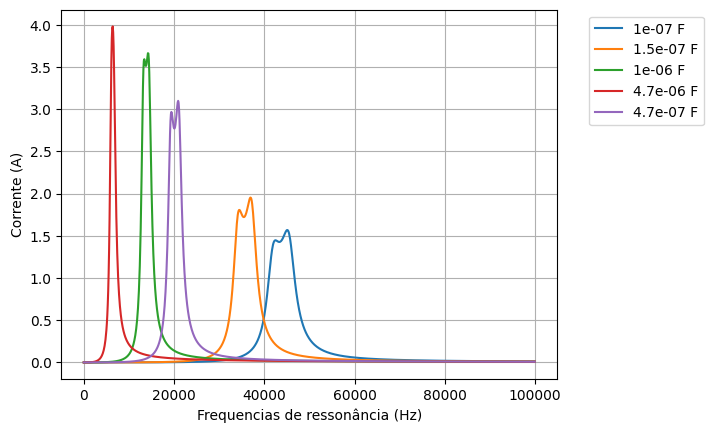

In [175]:
capacitores = [0.1e-6,150e-9,1e-6,4.7e-6,0.47e-6]

freq_reson = range(1,100000,100)

In_lis89 = [[],[],[],[],[],[]]


for C in capacitores:
    for fr in freq_reson:
        In_lis89[capacitores.index(C)].append(abs(correntes(fr,C)[1]))
        
    print(max(In_lis89[capacitores.index(C)]))



#plotando os gráficos
for i in range(0,5):
    plt.plot(freq_reson,In_lis89[i],label=f'{capacitores[i]} F')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Corrente (A)')
plt.grid()
plt.show()



In [76]:
In_lis89[3].index(max(In_lis89[3]))

64

**3- Escolha da Frequência de operação do circuito**

In [176]:

def V2 (L, fr):
    #definindo variavéis
    C = 1/(fr**2*4*pi**2*L)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 1
    Rc = 400
    k = 0.1
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

In [93]:
#definindo valores de V2 pra cada indutância e assim para cada frequência
indutancias = [100e-6,500e-6,200e-6,300e-6,400e-6,0.8e-3]
freq_reson = range(1,100000,100)

In_lis = [[],[],[],[],[],[]]

contador = 0
for L in indutancias:
        for fr in freq_reson:
            In_lis[indutancias.index(L)].append(abs(V2(L,fr)))
            contador+=1

print(len(In_lis[1]))

1000


1000
1000
1000
1000
1000
1000


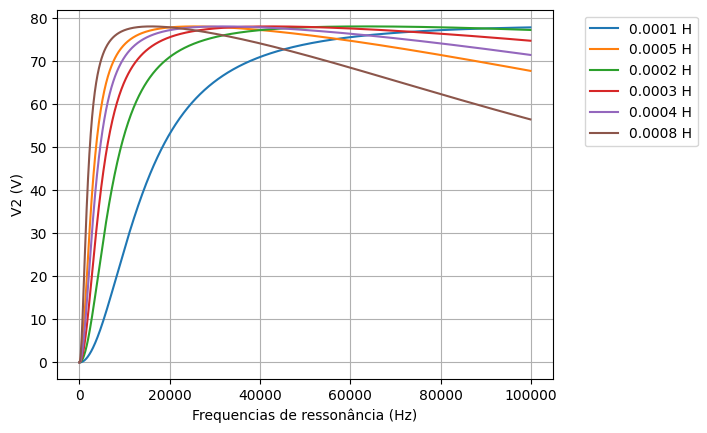

In [177]:
#plotando os gráficos
for i in range(0,6):
    plt.plot(freq_reson,In_lis[i],label=f'{indutancias[i]} H')
    print(len(In_lis[i]))

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('V2 (V)')
plt.grid()
plt.show()

In [ ]:
def V2_2 (C, fr):
    #definindo variavéis
    L = 1/(fr**2*4*pi**2*C)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 719.7e-3
    Rc = 400
    k = 0.1
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10*2/pi
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

52.899589868434354
52.899590929155714
52.89952608380809
52.89920658049317
52.899555947057024


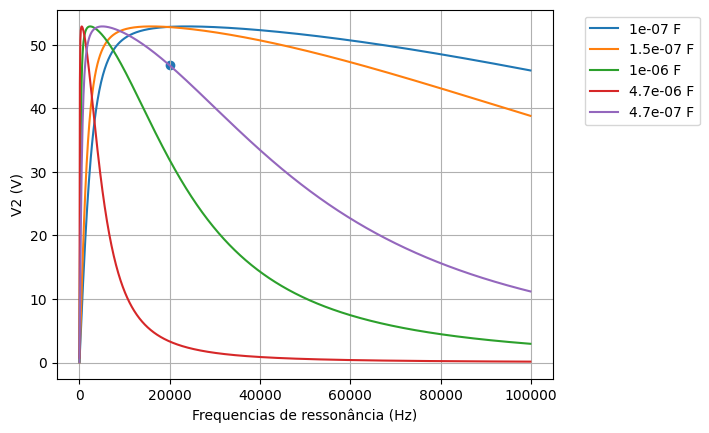

In [ ]:
capacitores = [0.1e-6,150e-9,1e-6,4.7e-6,0.47e-6]

freq_reson = range(1,100000,100)

In_lis89 = [[],[],[],[],[],[]]


for C in capacitores:
    for fr in freq_reson:
        In_lis89[capacitores.index(C)].append(abs(V2_2(C,fr)))
        
    print(max(In_lis89[capacitores.index(C)]))



#plotando os gráficos
for i in range(0,5):
    plt.plot(freq_reson,In_lis89[i],label=f'{capacitores[i]} F')

plt.scatter(20000,abs(V2_2(4.7e-7,20000)))
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('V2 (V)')
plt.grid()
plt.show()



#1.5 e-07

## 5)

In [ ]:
#S = P + jQ -> queremos o P
#S = Vef * Ief*

#definindo função para calcular o P
def potencia_real(L, fr):
    #definindo variavéis
    C = 1/(fr**2*4*pi**2*L)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 5
    Rc = 4
    k = 0.7
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I1 = dot(linalg.inv(A),V)[0]
    I2 = dot(linalg.inv(A),V)[1]

    #V2
    V2 = ZeqCRc*I2
    
    #cálculo da potência real
    S1 = (Uf/sqrt(2)) * (I1/sqrt(2)).conjugate()
    S2 = (V2/sqrt(2))* (I2/sqrt(2)).conjugate()
    P1 = S1.real
    P2 = S2.real
    return P1, P2

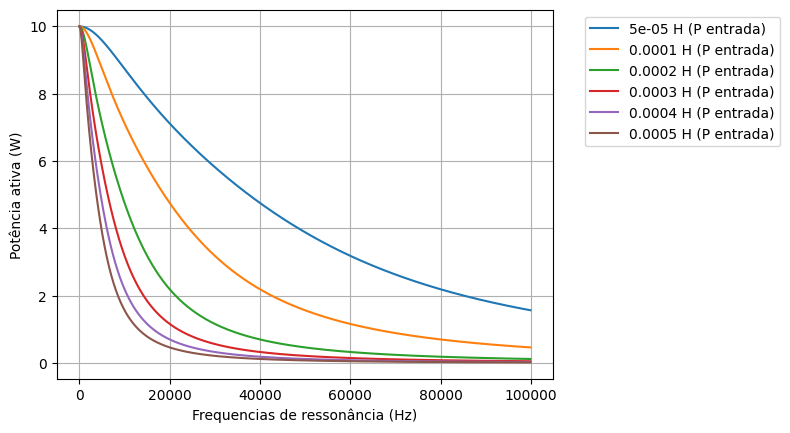

In [ ]:
#plotando os gráficos
In_lis2 = [[],[],[],[],[],[]]
In_lis3 = [[],[],[],[],[],[]]
for L in indutancias:
        for fr in freq_reson:
            In_lis2[indutancias.index(L)].append(abs(potencia_real(L,fr)[0]))
            


for i in range(0,6):
    plt.plot(freq_reson,In_lis2[i],label=f'{indutancias[i]} H (P entrada)')


plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Potência ativa (W)')
plt.grid()
plt.show()

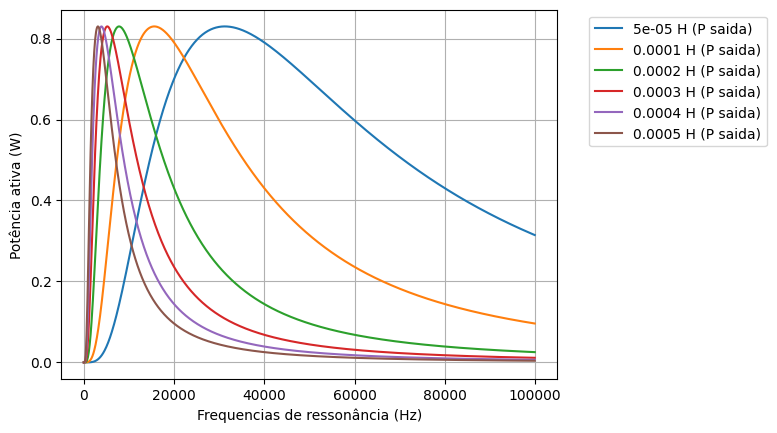

In [ ]:
In_lis7 = [[],[],[],[],[],[]]

for L in indutancias:
        for fr in freq_reson:
            In_lis7[indutancias.index(L)].append(abs(potencia_real(L,fr)[1]))
            


for i in range(0,6):
    plt.plot(freq_reson,In_lis7[i],label=f'{indutancias[i]} H (P saida)')


plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Potência ativa (W)')
plt.grid()
plt.show()

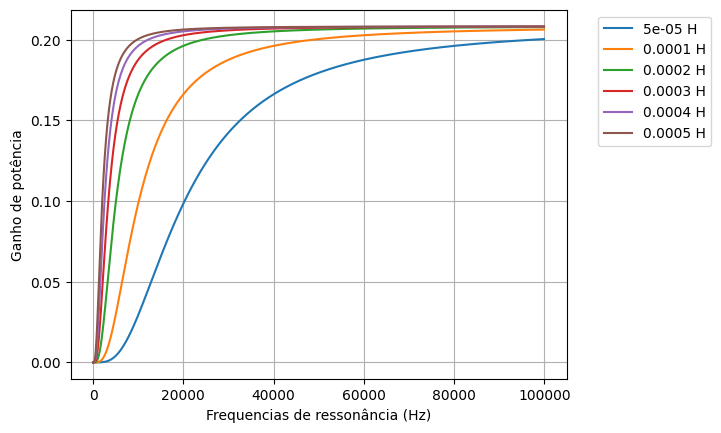

In [ ]:
#ganho de potência P = P2/P1
In_lis4 = [[],[],[],[],[],[]]
for L in indutancias:
        for fr in freq_reson:
            In_lis4[indutancias.index(L)].append(abs(potencia_real(L,fr)[1]/potencia_real(L,fr)[0]))
            
for i in range(0,6):
    plt.plot(freq_reson,In_lis4[i],label=f'{indutancias[i]} H') 

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Ganho de potência')
plt.grid()
plt.show()


## 6) Gráfico da tensão V2 para diferentes valores de _k_

In [193]:
def V2_3 (k):
    #definindo variavéis
    C = 4.7e-6
    fr = 6200
    L = 0.152e-3
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 719.7e-3
    Rc = 400
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10*2/pi
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

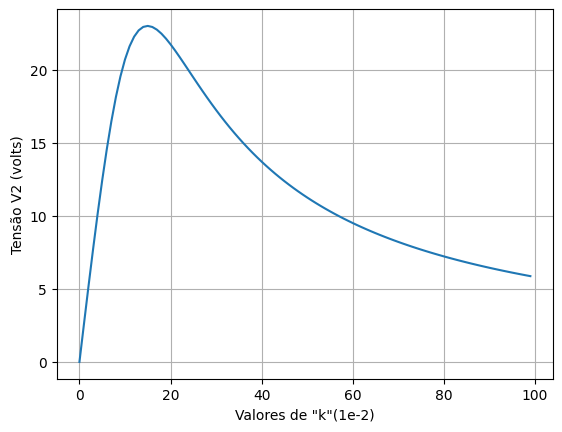

[0.0, 2.6204701706946203, 5.208310723073342, 7.729906099741345, 10.150160352551598, 12.432889737631951, 14.542295436350145, 16.4454084597257, 18.115061930226542, 19.532695654822806, 20.69026385424885, 21.59074763343803, 22.247183545956393, 22.680528378631628, 22.916923344131114, 22.98493942978341, 22.913233960054125, 22.728832752169737, 22.456063059041945, 22.11604276723117, 21.72658172668598, 21.302350893161822, 20.855200244192098, 20.39453926659325, 19.927724091813744, 19.46041901447323, 18.996916680035444, 18.54041179507663, 18.09322936065912, 17.657011591421323, 17.23286897502311, 16.821501132479984, 16.42329277274226, 16.03838941044518, 15.66675681669598, 15.30822749674764, 14.96253688158389, 14.629351399298557, 14.308290157193337, 13.998941609437408, 13.700876297518608, 13.413656520597872, 13.13684360999406, 12.87000333736525, 12.612709872099007, 12.364548613698345, 12.125118154460544, 11.894031572412954, 11.670917211049812, 11.455419068344558, 11.24719689077559, 11.0459260471163

In [195]:
valores_k = range(0,100,1)

tensao_p_k =  []

for i in valores_k:
    i = i/100
    tensao_p_k.append(abs(V2_3(i)))

plt.plot(valores_k,tensao_p_k)
plt.xlabel('Valores de "k"(1e-2)')
plt.ylabel("Tensão V2 (volts)")
plt.grid()
plt.show()
print(tensao_p_k)


#distancia = 1cm = 23 volts 

In [ ]:
valoresdetensaomedidos = [21.302350893161822,16.42329277274226,14.308290157193337,]

In [166]:
import string

def obter_nomes_colunas_linha():
    primeira_coluna = 'FWK'
    ultima_coluna = 'GDM'
    
    todas_colunas = list(string.ascii_uppercase)  # A, B, C, ..., Z
    todas_colunas.extend([f'{a}{b}' for a in string.ascii_uppercase for b in string.ascii_uppercase])  # AA, AB, AC, ..., ZZ
    todas_colunas.extend([f'{a}{b}{c}' for a in string.ascii_uppercase for b in string.ascii_uppercase for c in string.ascii_uppercase])  # AAA, AAB, AAC, ..., ZZZ

    indice_primeira_coluna = todas_colunas.index(primeira_coluna)
    indice_ultima_coluna = todas_colunas.index(ultima_coluna)

    nomes_colunas_linha = todas_colunas[indice_primeira_coluna:indice_ultima_coluna + 1]
    return nomes_colunas_linha



In [167]:
contador = 1
for i in range(0,43,1):
    primeira = obter_nomes_colunas_linha()[contador]
    ultima = obter_nomes_colunas_linha()[contador+7]
    print(f"=MÉDIA({primeira}4:{ultima}4)")
    contador+=8

=MÉDIA(FWL4:FWS4)
=MÉDIA(FWT4:FXA4)
=MÉDIA(FXB4:FXI4)
=MÉDIA(FXJ4:FXQ4)
=MÉDIA(FXR4:FXY4)
=MÉDIA(FXZ4:FYG4)
=MÉDIA(FYH4:FYO4)
=MÉDIA(FYP4:FYW4)
=MÉDIA(FYX4:FZE4)
=MÉDIA(FZF4:FZM4)
=MÉDIA(FZN4:FZU4)
=MÉDIA(FZV4:GAC4)
=MÉDIA(GAD4:GAK4)
=MÉDIA(GAL4:GAS4)
=MÉDIA(GAT4:GBA4)
=MÉDIA(GBB4:GBI4)
=MÉDIA(GBJ4:GBQ4)
=MÉDIA(GBR4:GBY4)
=MÉDIA(GBZ4:GCG4)
=MÉDIA(GCH4:GCO4)
=MÉDIA(GCP4:GCW4)
=MÉDIA(GCX4:GDE4)
=MÉDIA(GDF4:GDM4)


IndexError: list index out of range